In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import*
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.datasets import mnist
import random
from numpy import argmax

In [13]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [14]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

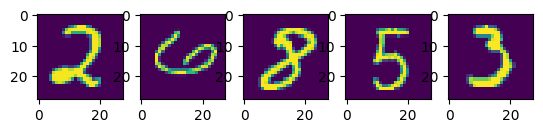

In [15]:
for i in range (1,6):
  plt.subplot(1,5,i)
  plt.imshow(x_train[random.randint(0,5000)])

In [16]:
x_train = x_train.reshape( (x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_train = x_test. reshape( (x_test.shape[0], x_test.shape[1], x_test.shape[2] ,1))
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

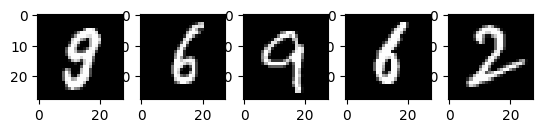

In [17]:
for i in range (1,6) :
  plt.subplot(1,5,i)
  plt.imshow(x_train[random.randint(0,5000)] , cmap ="gray")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)             

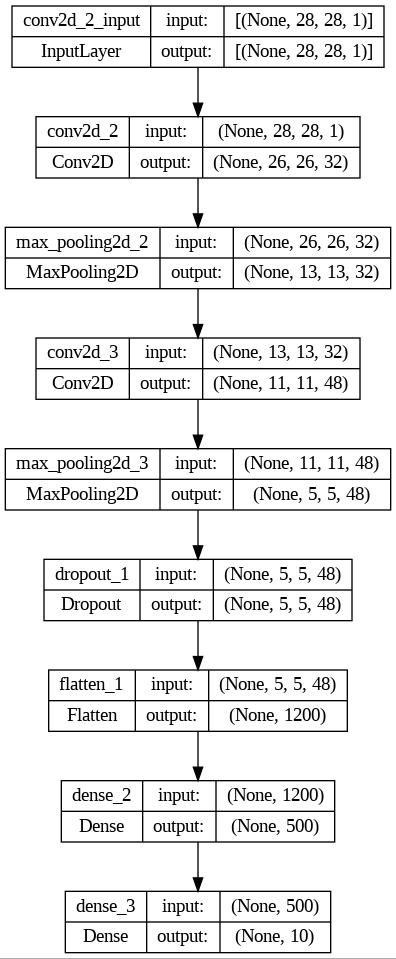

In [18]:
model= Sequential()
model.add(Conv2D(32, (3,3) , activation='relu' , input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3) , activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu' ))
model.add(Dense(10,activation='softmax' ))
model.summary()
plot_model(model, 'mymodel.jpg', show_shapes=True)

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5 , verbose =2, batch_size=128, validation_split=0.1)

Epoch 1/5
71/71 - 9s - loss: 2.3055 - accuracy: 0.1072 - val_loss: 2.3006 - val_accuracy: 0.1120 - 9s/epoch - 130ms/step
Epoch 2/5
71/71 - 7s - loss: 2.3006 - accuracy: 0.1114 - val_loss: 2.3016 - val_accuracy: 0.1030 - 7s/epoch - 102ms/step
Epoch 3/5
71/71 - 7s - loss: 2.2993 - accuracy: 0.1143 - val_loss: 2.3015 - val_accuracy: 0.1030 - 7s/epoch - 95ms/step
Epoch 4/5
71/71 - 8s - loss: 2.2972 - accuracy: 0.1194 - val_loss: 2.3023 - val_accuracy: 0.0960 - 8s/epoch - 109ms/step
Epoch 5/5
71/71 - 6s - loss: 2.2947 - accuracy: 0.1207 - val_loss: 2.3009 - val_accuracy: 0.1020 - 6s/epoch - 90ms/step


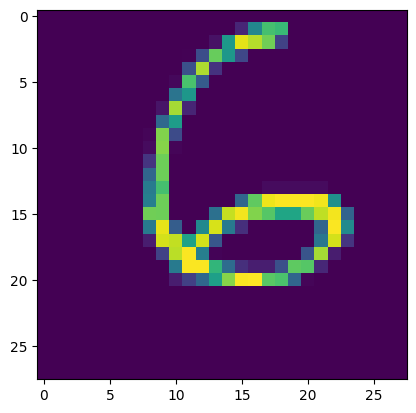

In [20]:
n = random.randint(0,5000)
test_img = x_train[n]
plt.imshow(test_img)
plt.show()

In [21]:
test_img.shape

(28, 28, 1)

In [22]:
test_img = test_img.reshape(1,28,28,1)

p = model.predict([test_img])
print("prediction = {} ".format(argmax(p)))

1/1 [==============================] - 0s 76ms/step
prediction = 0 
